##### Step C : Dimensionality Reduction

We currently have : 1000 images → 1280-D embeddings
Problems : Too high dimensional, Noisy, Impossible to visualize

t-SNE directly on 1280-D is slow + unstable

So we do : 1280-D → PCA(50) → t-SNE(3)

--> Important 
PCA → noise removal + speed + variance preservation
t-SNE → visual grouping (NOT global geometry)

##### Step C.1 --> Imoprts & Load Saved Articrafts 

In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

from sklearn.decomposition import PCA 
from sklearn.manifold import TSNE

##### Load features extracted in step B:

In [6]:
features = np.load("../app/image_features.npy")
print("Features Shape : ", features.shape)

Features Shape :  (1000, 1280)


##### Step C.2 --> PCA (Noise Filtering, Not Visualization)

Here we will take the Dimnesions Number as : 50, because : 
Empirically retains ~90-95% variance,
much faster to t-SNE, 
removes the redundant Directions 

In [7]:
pca = PCA(n_components = 50, random_state = 42)
pca_features = pca.fit_transform(features)
print("PCA Shape : ", pca_features.shape)

PCA Shape :  (1000, 50)


##### Step C.3 --> PCA Explained Variance 

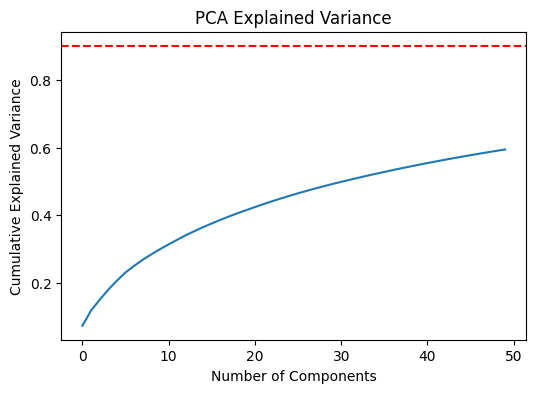

In [8]:
explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(6,4))
plt.plot(explained_variance)
plt.axhline(y = 0.90, color = 'r', linestyle = '--')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance")
plt.show()

##### Step C.4 --> t-SNE (Only For Visualization)

In [9]:
tsne = TSNE(
    n_components=3,
    perplexity=30,
    learning_rate=200,
    random_state=42,
    init="pca"
)

tsne_embeddings = tsne.fit_transform(pca_features)

print("t-SNE shape:", tsne_embeddings.shape)


t-SNE shape: (1000, 3)


##### Step C.5 --> Quick 3D Sanity Visualization 

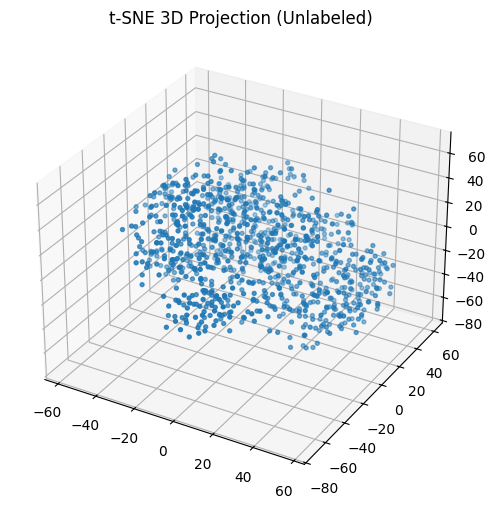

In [10]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    tsne_embeddings[:,0],
    tsne_embeddings[:,1],
    tsne_embeddings[:,2],
    s=8
)

ax.set_title("t-SNE 3D Projection (Unlabeled)")
plt.show()


##### Step C.6 --> save Options for Next Steps 

In [11]:
np.save("../app/pca_features.npy", pca_features)
np.save("../app/tsne_3d.npy", tsne_embeddings)


Why PCA before t-SNE?

PCA removes noise

PCA preserves variance

PCA accelerates t-SNE

t-SNE preserves local neighborhoods, not distance